作業 6: Tensorflow 作業 - CNN

Dropout Rate(目前 0.2)

Batch Normalization (API?)

Kernel Size (目前 3 x 3)

Activation Function (目前 Relu)

Optimization: (目前 adam)

In [1]:
import tensorflow as tf
print(tf.__version__)

2.6.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [3]:
# 載入影像
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

4431872/4422102 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


In [4]:
# (28x28)乃 2D!
# convolution 需要 height x width x color 我們得 expand_dims
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)

(60000, 28, 28, 1)


In [5]:
# 共有多少種物品
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [7]:
# 使用 函數式接口 functional API 建模
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)
model2 = Model(i, x)
model3 = Model(i, x)

In [9]:
# 使用 函數式接口 functional API 建模
i2 = Input(shape=x_train[0].shape)
x2 = Conv2D(32, (3, 3), strides=2, activation='sigmoid')(i2)
x2 = Conv2D(64, (3, 3), strides=2, activation='sigmoid')(x2)
x2 = Conv2D(128, (3, 3), strides=2, activation='sigmoid')(x2)
x2 = Flatten()(x2)
x2 = Dropout(0.2)(x2)
x2 = Dense(512, activation='sigmoid')(x2)
x2 = Dropout(0.2)(x2)
x2 = Dense(K, activation='softmax')(x2)

model4 = Model(i2, x2)
model5 = Model(i2, x2)
model6 = Model(i2, x2)


In [10]:
# your improved model code here to replace the above one

In [11]:
# 編譯與訓練
# 請確認用GPU
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model2.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model3.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)
r2 = model2.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)
r3 = model3.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 30s 16ms/step - loss: 0.5270 - accuracy: 0.8052 - val_loss: 0.3997 - val_accuracy: 0.8480
Epoch 2/15
1875/1875 [==============================] - 29s 15ms/step - loss: 0.3701 - accuracy: 0.8615 - val_loss: 0.3739 - val_accuracy: 0.8572
Epoch 3/15
1875/1875 [==============================] - 29s 15ms/step - loss: 0.3216 - accuracy: 0.8786 - val_loss: 0.3357 - val_accuracy: 0.8723
Epoch 4/15
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2861 - accuracy: 0.8917 - val_loss: 0.3228 - val_accuracy: 0.8825
Epoch 5/15
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2623 - accuracy: 0.9018 - val_loss: 0.3025 - val_accuracy: 0.8933
Epoch 6/15
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2419 - accuracy: 0.9085 - val_loss: 0.2944 - val_accuracy: 0.8935
Epoch 7/15
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2205 - accuracy: 0.9171 - val_loss: 0.3254 -

In [12]:
# 編譯與訓練
# 請確認用GPU
model4.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model5.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model6.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r4 = model4.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)
r5 = model5.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)
r6 = model6.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 29s 15ms/step - loss: 0.9128 - accuracy: 0.6569 - val_loss: 0.5867 - val_accuracy: 0.7836
Epoch 2/15
1875/1875 [==============================] - 28s 15ms/step - loss: 0.5471 - accuracy: 0.7937 - val_loss: 0.5135 - val_accuracy: 0.8037
Epoch 3/15
1875/1875 [==============================] - 28s 15ms/step - loss: 0.4800 - accuracy: 0.8184 - val_loss: 0.4738 - val_accuracy: 0.8166
Epoch 4/15
1875/1875 [==============================] - 29s 15ms/step - loss: 0.4424 - accuracy: 0.8320 - val_loss: 0.4425 - val_accuracy: 0.8357
Epoch 5/15
1875/1875 [==============================] - 28s 15ms/step - loss: 0.4148 - accuracy: 0.8432 - val_loss: 0.4162 - val_accuracy: 0.8417
Epoch 6/15
1875/1875 [==============================] - 29s 15ms/step - loss: 0.3934 - accuracy: 0.8501 - val_loss: 0.4065 - val_accuracy: 0.8444
Epoch 7/15
1875/1875 [==============================] - 28s 15ms/step - loss: 0.3783 - accuracy: 0.8556 - val_loss: 0.3849 -

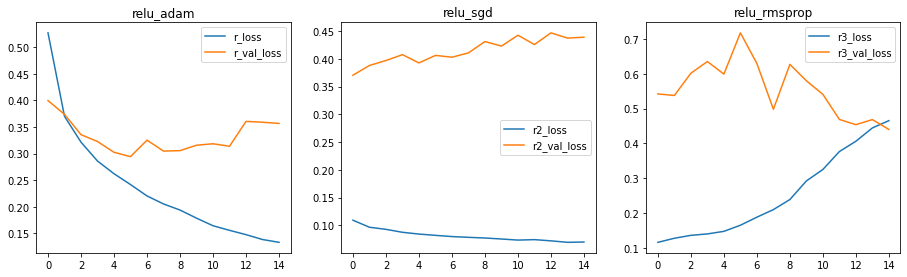

In [13]:
# 繪出迭代損失
import matplotlib.pyplot as plt
# plt.plot(r.history['loss'], label='loss')
# plt.plot(r.history['val_loss'], label='val_loss')
# plt.legend()
# =================================
plt.subplot(1,3,1) 
plt.plot(r.history['loss'], label='r_loss')
plt.plot(r.history['val_loss'], label='r_val_loss')
plt.title('relu_adam')

plt.legend()
plt.subplot(1,3,2) 
plt.plot(r2.history['loss'], label='r2_loss')
plt.plot(r2.history['val_loss'], label='r2_val_loss')
plt.title('relu_sgd')
plt.legend()
plt.subplot(1,3,3) 
plt.plot(r3.history['loss'], label='r3_loss')
plt.plot(r3.history['val_loss'], label='r3_val_loss')
plt.title('relu_rmsprop')
plt.legend()
plt.subplots_adjust(left=0.0,
                    bottom=0.1, 
                    right=2, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)

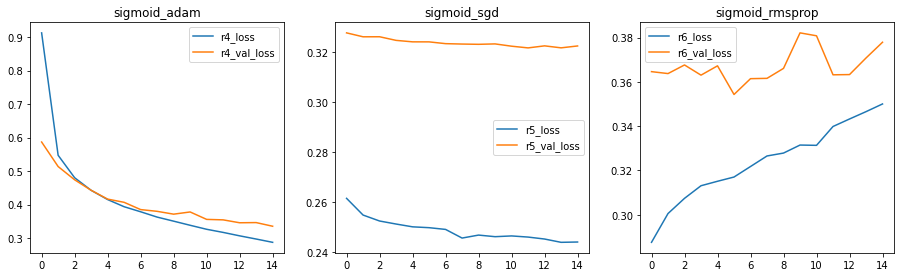

In [14]:
# 繪出迭代損失
import matplotlib.pyplot as plt
# plt.plot(r.history['loss'], label='loss')
# plt.plot(r.history['val_loss'], label='val_loss')
# plt.legend()
# =================================
plt.subplot(1,3,1) 
plt.plot(r4.history['loss'], label='r4_loss')
plt.plot(r4.history['val_loss'], label='r4_val_loss')
plt.title('sigmoid_adam')

plt.legend()
plt.subplot(1,3,2) 
plt.plot(r5.history['loss'], label='r5_loss')
plt.plot(r5.history['val_loss'], label='r5_val_loss')
plt.title('sigmoid_sgd')
plt.legend()
plt.subplot(1,3,3) 
plt.plot(r6.history['loss'], label='r6_loss')
plt.plot(r6.history['val_loss'], label='r6_val_loss')
plt.title('sigmoid_rmsprop')
plt.legend()
plt.subplots_adjust(left=0.0,
                    bottom=0.1, 
                    right=2, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)

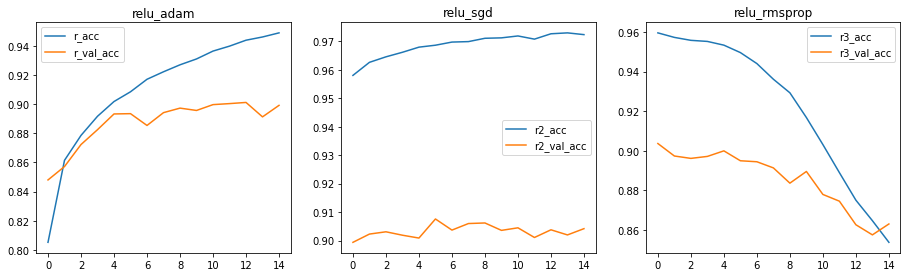

In [15]:
# 繪出迭代精準度
# plt.plot(r.history['accuracy'], label='acc')
# plt.plot(r.history['val_accuracy'], label='val_acc')
# plt.legend()
# ===================================================
# 繪出每迭代的精準度
plt.subplot(1,3,1)
plt.plot(r.history['accuracy'], label='r_acc')
plt.plot(r.history['val_accuracy'], label='r_val_acc')
plt.title('relu_adam')
plt.legend()
plt.subplot(1,3,2)
plt.plot(r2.history['accuracy'], label='r2_acc')
plt.plot(r2.history['val_accuracy'], label='r2_val_acc')
plt.title('relu_sgd')
plt.legend()
plt.subplot(1,3,3)
plt.plot(r3.history['accuracy'], label='r3_acc')
plt.plot(r3.history['val_accuracy'], label='r3_val_acc')
plt.title('relu_rmsprop')
plt.legend()
plt.subplots_adjust(left=0.0,
                    bottom=0.1, 
                    right=2, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)

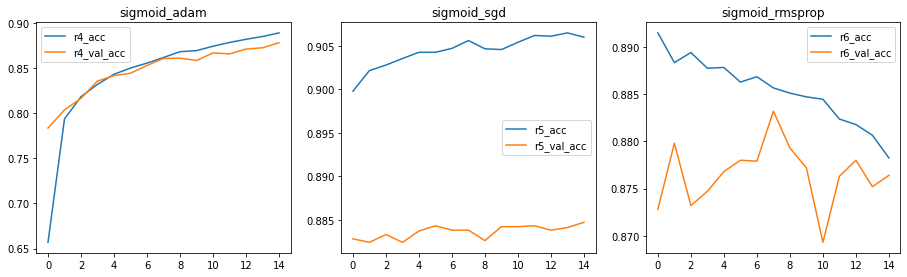

In [16]:
# 繪出迭代精準度
# plt.plot(r.history['accuracy'], label='acc')
# plt.plot(r.history['val_accuracy'], label='val_acc')
# plt.legend()
# ===================================================
# 繪出每迭代的精準度
plt.subplot(1,3,1)
plt.plot(r4.history['accuracy'], label='r4_acc')
plt.plot(r4.history['val_accuracy'], label='r4_val_acc')
plt.title('sigmoid_adam')
plt.legend()
plt.subplot(1,3,2)
plt.plot(r5.history['accuracy'], label='r5_acc')
plt.plot(r5.history['val_accuracy'], label='r5_val_acc')
plt.title('sigmoid_sgd')
plt.legend()
plt.subplot(1,3,3)
plt.plot(r6.history['accuracy'], label='r6_acc')
plt.plot(r6.history['val_accuracy'], label='r6_val_acc')
plt.title('sigmoid_rmsprop')
plt.legend()
plt.subplots_adjust(left=0.0,
                    bottom=0.1, 
                    right=2, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)

Confusion matrix, without normalization
[[766   5  35  56   4   1 127   0   6   0]
 [  1 969   1  20   3   0   5   0   1   0]
 [  9   0 834  10  76   0  71   0   0   0]
 [  5  14  25 891  26   0  39   0   0   0]
 [  2   1  74  31 767   0 124   0   0   1]
 [  0   0   0   3   0 917   0  51   1  28]
 [112   2 120  37  88   1 633   0   6   1]
 [  0   0   0   0   0   4   0 956   0  40]
 [  4   0  10   7  12   5  21   6 933   2]
 [  0   0   1   1   0   4   0  29   0 965]]


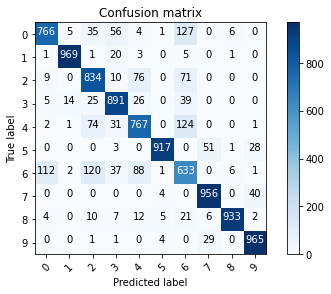

In [17]:
# 繪出混淆矩陣
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

Confusion matrix, without normalization
[[766   5  35  56   4   1 127   0   6   0]
 [  1 969   1  20   3   0   5   0   1   0]
 [  9   0 834  10  76   0  71   0   0   0]
 [  5  14  25 891  26   0  39   0   0   0]
 [  2   1  74  31 767   0 124   0   0   1]
 [  0   0   0   3   0 917   0  51   1  28]
 [112   2 120  37  88   1 633   0   6   1]
 [  0   0   0   0   0   4   0 956   0  40]
 [  4   0  10   7  12   5  21   6 933   2]
 [  0   0   1   1   0   4   0  29   0 965]]


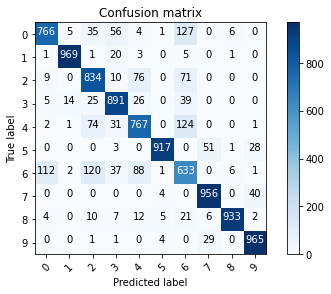

In [18]:
p_test2 = model2.predict(x_test).argmax(axis=1)
cm2 = confusion_matrix(y_test, p_test2)
plot_confusion_matrix(cm2, list(range(10)))

Confusion matrix, without normalization
[[766   5  35  56   4   1 127   0   6   0]
 [  1 969   1  20   3   0   5   0   1   0]
 [  9   0 834  10  76   0  71   0   0   0]
 [  5  14  25 891  26   0  39   0   0   0]
 [  2   1  74  31 767   0 124   0   0   1]
 [  0   0   0   3   0 917   0  51   1  28]
 [112   2 120  37  88   1 633   0   6   1]
 [  0   0   0   0   0   4   0 956   0  40]
 [  4   0  10   7  12   5  21   6 933   2]
 [  0   0   1   1   0   4   0  29   0 965]]


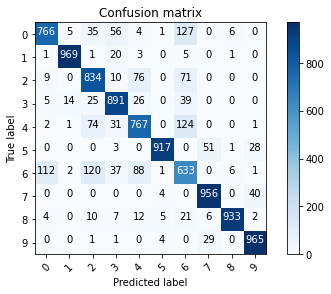

In [19]:
p_test3 = model3.predict(x_test).argmax(axis=1)
cm3 = confusion_matrix(y_test, p_test3)
plot_confusion_matrix(cm3, list(range(10)))

Confusion matrix, without normalization
[[845   4  29  39   3   1  70   0   9   0]
 [  1 972   0  18   2   0   4   0   3   0]
 [ 13   0 827   9  72   0  73   0   6   0]
 [ 12   7  23 908  14   2  30   0   3   1]
 [  1   2  71  39 782   0  97   0   8   0]
 [  0   0   0   1   0 982   0   9   0   8]
 [141   1  94  38  83   0 618   0  25   0]
 [  0   0   0   0   0  51   0 908   0  41]
 [  0   1   8   2   3   8   5   5 966   2]
 [  0   0   0   0   0  17   0  27   0 956]]


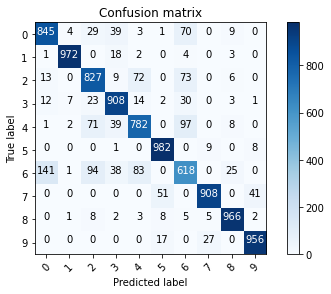

In [20]:
p_test4 = model4.predict(x_test).argmax(axis=1)
cm4 = confusion_matrix(y_test, p_test4)
plot_confusion_matrix(cm4, list(range(10)))

Confusion matrix, without normalization
[[845   4  29  39   3   1  70   0   9   0]
 [  1 972   0  18   2   0   4   0   3   0]
 [ 13   0 827   9  72   0  73   0   6   0]
 [ 12   7  23 908  14   2  30   0   3   1]
 [  1   2  71  39 782   0  97   0   8   0]
 [  0   0   0   1   0 982   0   9   0   8]
 [141   1  94  38  83   0 618   0  25   0]
 [  0   0   0   0   0  51   0 908   0  41]
 [  0   1   8   2   3   8   5   5 966   2]
 [  0   0   0   0   0  17   0  27   0 956]]


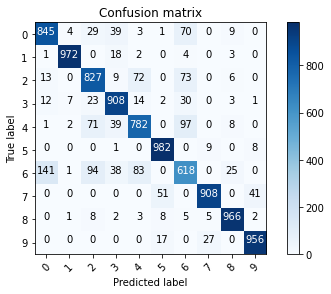

In [21]:
p_test5 = model5.predict(x_test).argmax(axis=1)
cm5 = confusion_matrix(y_test, p_test5)
plot_confusion_matrix(cm5, list(range(10)))

In [22]:
# 映射標籤
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

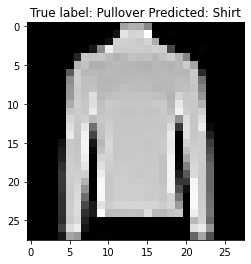

In [23]:
# 展示分類錯誤樣本
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

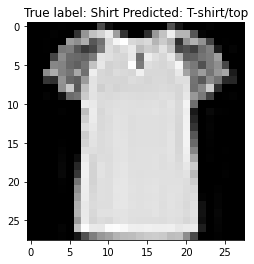

In [24]:
# 展示分類錯誤樣本
misclassified_idx = np.where(p_test2 != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

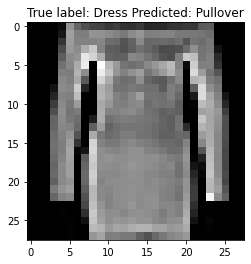

In [25]:
# 展示分類錯誤樣本
misclassified_idx = np.where(p_test3 != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

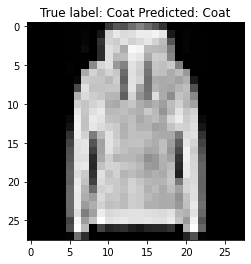

In [26]:
# 展示分類錯誤樣本
misclassified_idx = np.where(p_test4 != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

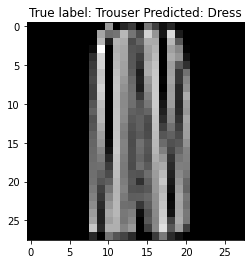

In [27]:
# 展示分類錯誤樣本
misclassified_idx = np.where(p_test5 != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

In [28]:
# 展示分類錯誤樣本
misclassified_idx = np.where(p_test6 != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

NameError: ignored